#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Test/homework4_input_data.csv')

#myData = drive('/content/drive/MyDrive/Test/homework4_input_data.csv')
df.head()

,id,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,...,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL,Class
0,TCGA-AB-2828-03,3.935027,0.523329,0.0,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,...,8.972232,1.560704,0.000000,0.00000,0.0,11.189255,5.866117,0.000000,7.560923,Leukemia
1,TCGA-AB-2846-03,3.372801,0.000000,0.0,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,...,8.662337,2.509522,0.000000,0.00000,0.0,9.472547,6.514825,0.289298,8.023838,Leukemia
2,TCGA-AB-2870-03,4.198301,0.000000,0.0,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,...,8.848274,3.137405,0.185980,0.00000,0.0,9.710047,0.000000,0.000000,8.031553,Leukemia
3,TCGA-AB-2872-03,4.115014,0.000000,0.0,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,...,7.730065,3.087055,0.380857,0.23682,0.0,6.085074,6.012453,0.411678,5.186830,Leukemia
4,TCGA-AB-2881-03,3.662169,0.467823,0.0,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,...,8.414421,2.683150,0.176611,0.00000,0.0,8.203471,5.718898,0.000000,8.031553,Leukemia


In [5]:
df.shape

(4336, 3002)

In [6]:
independent_vars = [list(df.columns)]
dependent_vars = ['Class']
X = df.iloc[:,1:3001]
Y = df[['Class']]



In [7]:
scaler = StandardScaler()

X_rescaled = scaler.fit_transform(X)

\

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0, stratify = Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3468, 3000), (3468, 1), (868, 3000), (868, 1))

In [9]:
model = LinearSVC().fit(X_train,Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.98


In [10]:
arr = cross_val_score(model,X_rescaled,Y)
print('Individual cross-validation accuracies: '+str(arr))
#print('Individual cross-validation accuracies: {0})'.format(cross_val_score(model,X_rescaled,Y)))

print("Mean cross validation score: {:.2f}".format(sum(arr)/5))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Individual cross-validation accuracies: [0.97465438 0.96309112 0.95963091 0.95847751 0.96539792]
Mean cross validation score: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[ 66   0   0   0   0   0   0   0   0   0   0   0]
 [  0 175   0   0   0   0   0   0   0   0   0   0]
 [  0   0  69   0   0   0   0   0   0   0   5   0]
 [  0   0   0  21   0   0   0   0   0   0   0   2]
 [  0   0   0   0  83   0   0   0   0   0   0   0]
 [  0   0   0   0   0  84   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   0   0   0   0   0   0  83   2   0   0   0]
 [  0   0   0   0   0   0   2   2  74   0   0   0]
 [  0   0   0   0   0   0   0   0   0  68   0   0]
 [  0   0   8   0   0   0   0   0   0   0  18   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.93 0.   0.   0.   0.   0.   0.   0.   0.07 0.  ]
 [0.   0.   0.   0.91 0.   0.   0.   0.   0.   0.   0.   0.09]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.

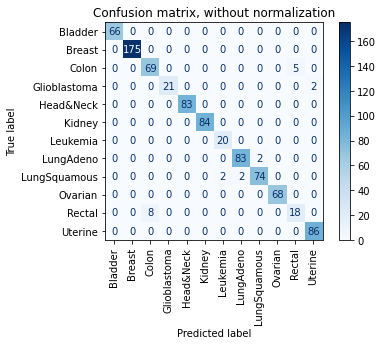

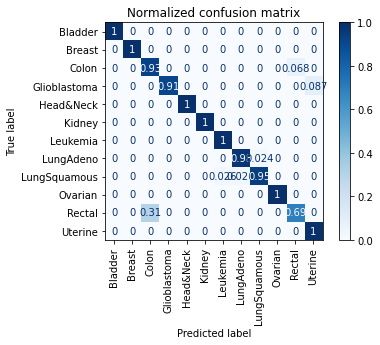

In [11]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                 xticks_rotation='vertical')
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [12]:
X_reduced = PCA(n_components=2).fit_transform(X)

In [13]:
X

,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,ITGA3,...,SULT1B1,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL
0,3.935027,0.523329,0.000000,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,0.202624,...,4.458889,8.972232,1.560704,0.000000,0.000000,0.000000,11.189255,5.866117,0.000000,7.560923
1,3.372801,0.000000,0.000000,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,0.449673,...,4.322699,8.662337,2.509522,0.000000,0.000000,0.000000,9.472547,6.514825,0.289298,8.023838
2,4.198301,0.000000,0.000000,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,1.624238,...,3.769234,8.848274,3.137405,0.185980,0.000000,0.000000,9.710047,0.000000,0.000000,8.031553
3,4.115014,0.000000,0.000000,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,0.326149,...,4.553598,7.730065,3.087055,0.380857,0.236820,0.000000,6.085074,6.012453,0.411678,5.186830
4,3.662169,0.467823,0.000000,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,1.658433,...,3.937198,8.414421,2.683150,0.176611,0.000000,0.000000,8.203471,5.718898,0.000000,8.031553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331,6.752567,2.061867,2.220238,1.670146,2.089802,4.105404,2.631701,3.974129,4.013841,7.201038,...,0.721246,3.698293,1.362715,3.888618,5.573470,4.011728,7.686758,7.651728,3.293383,2.737921
4332,6.481851,0.195973,3.082744,3.152085,1.974102,2.222543,2.449799,5.039194,2.903390,5.600291,...,0.146986,4.814241,1.090338,2.564054,4.638007,3.420460,6.780378,6.572266,0.912975,3.518969
4333,7.776659,0.859361,2.016015,1.995366,3.934322,2.520344,3.657478,3.805650,3.698809,5.940498,...,0.000000,3.442377,2.463595,5.406420,4.638007,4.104928,6.908519,10.183748,4.845148,2.069559
4334,8.421619,1.287896,0.000000,0.147612,2.094130,2.266953,1.881556,3.754020,3.412572,6.569963,...,0.138372,4.304535,0.841096,0.814483,1.931713,2.962235,6.634303,6.314444,1.895622,2.899793


<Figure size 432x288 with 0 Axes>

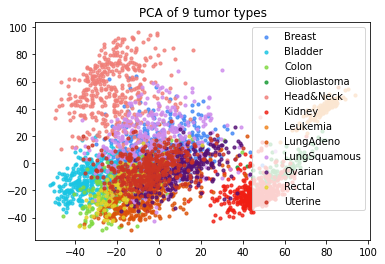

<Figure size 432x288 with 0 Axes>

In [14]:
colors = {"Breast": '#4287f5',
"Bladder": '#19c5e3',
"Colon": '#80d941',
"Glioblastoma": '#179933',
"Head&Neck": '#f07e78',
"Kidney": '#f01e13',
"Leukemia": '#f0841f',
"LungAdeno": '#db5209',
"LungSquamous": '#ce8ced',
"Ovarian": '#551075',
"Rectal": '#e3d329',
"Uterine":'#cc3423'}

for color, i, class_name in zip(colors.values(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], colors.keys()):
    plt.scatter(X_reduced[Y['Class'] == class_name, 0], X_reduced[Y['Class'] == class_name, 1], color=color, alpha=.8, s=10,
                label=class_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of 9 tumor types')
plt.figure()